<a href="https://colab.research.google.com/github/Eugenia27/cuandoLlueve/blob/master/Copia_de_Cuando_Llueve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importacion de librerias

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import plotly.plotly as plo
import plotly.graph_objs as go

## Lectura de datos

In [0]:
lluvias = pd.read_csv("https://raw.githubusercontent.com/lprone/cuandoLlueve/master/Analisis%20y%20visualizacion/rain.csv", parse_dates = True, index_col="date" )

## Previsualización de datos

In [4]:
lluvias.describe()

,rain
count,15034.000000
mean,3.331914
std,11.451975
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,220.000000


In [5]:
lluvias.head()

,rain
date,
1978-01-01,0
1978-01-02,0
1978-01-03,0
1978-01-04,0
1978-01-05,0


## Grafico de datos

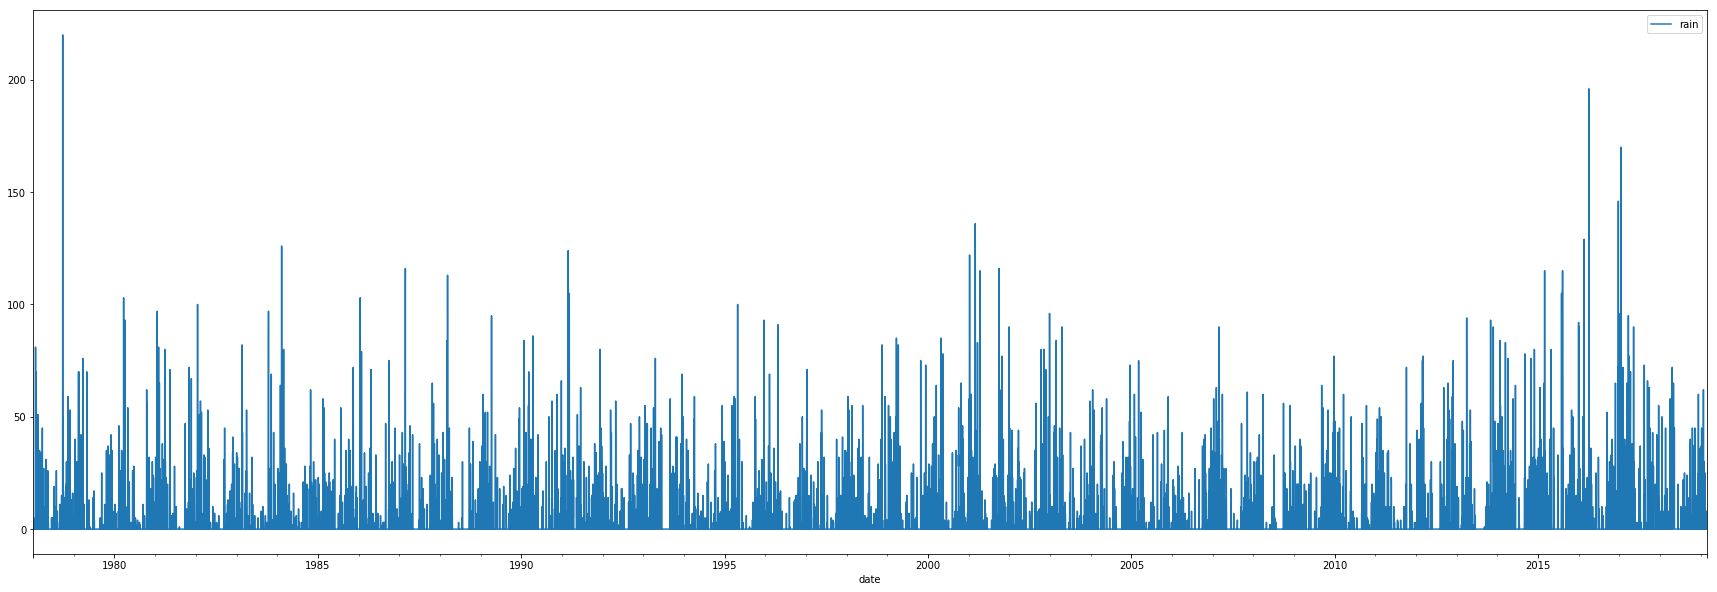

In [6]:
lluvias.plot(figsize=(30,10))

## Ejercicios

Ej 1) 
Realizar analisis descriptivo de los datos. Describir variables, calcular estadísticos que se consideren apropiados,etc

Ej 2) 
Graficar variables

Ej 3)
Realizar test de normalidad

Ej 4) 
Realizar analisis de correlacion e independencia entre variables

Ej 5)
Elaborar conclusiones a partir de los resultados obtenidos en los puntos anteriores

In [0]:
lluvias['mes'] = lluvias.index.month
lluvias['año'] = lluvias.index.year
lluvias['mesHid'] = (lluvias.index.month+6)%12+1

In [8]:
lluvias[lluvias.rain.isna()==True]

,rain,mes,año,mesHid
date,,,,


In [0]:
dict_estaciones={
  1 : 1,
  2 : 1,
  3 : 2,
  4 : 2,
  5 : 2,
  6 : 3,
  7 : 3,
  8 : 3,
  9 : 4,
  10: 4,
  11: 4,
  12: 1}


In [0]:
lluvias['estacion'] = lluvias.mes.map(dict_estaciones)

In [0]:
lluvias2000 = lluvias[lluvias.año==2000]

In [0]:
lluvias2000_mes = lluvias[lluvias.año==2000].groupby('mes').rain.sum()
lluvias2000_est = lluvias[lluvias.año==2000].groupby('estacion').rain.sum()

In [0]:
def plotcxaños(_año,_xaños,_leg_bool):
  delta=0
  for i in range(_xaños):
    año=_año+i
    lluvias_mes = lluvias[lluvias.año==año].groupby('mes').rain.sum()
    delta+=0.04
    color = (1-delta,0.+delta,0+delta)
    plt.plot(lluvias_mes.index,lluvias_mes.values,marker='.',color=color,label=str(año))
    
  plt.ylim(0,400)
  if _leg_bool==True:
      plt.legend(bbox_to_anchor=(1.05, 0.9))

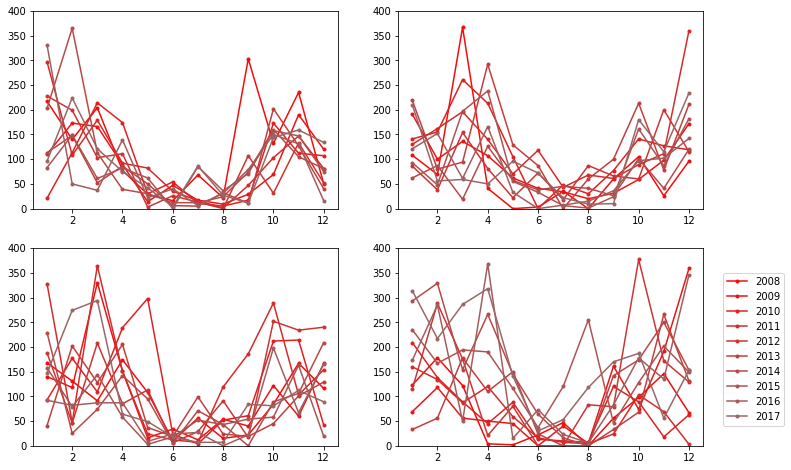

In [14]:
fig = plt.figure(figsize=(12,8))
ax=fig.add_subplot(221)
plotcxaños(1978,10,False)
ax=fig.add_subplot(222)
plotcxaños(1988,10,False)
ax=fig.add_subplot(223)
plotcxaños(1998,10,False)
ax=fig.add_subplot(224)
plotcxaños(2008,10,True)

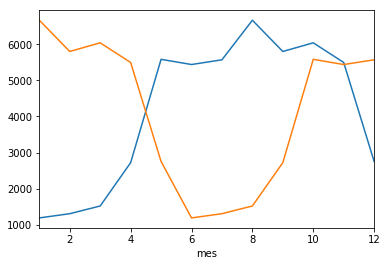

In [15]:
lluvias.groupby('mesHid').rain.sum().plot()
lluvias.groupby('mes').rain.sum().plot()

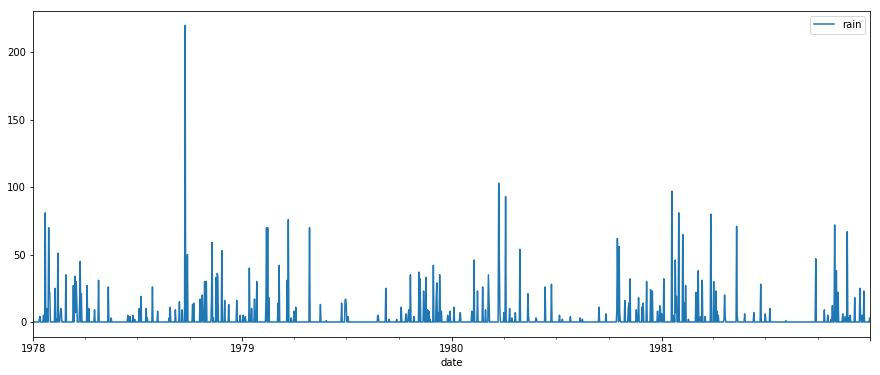

In [16]:
lluvias[['rain']][lluvias.index.year<1982].plot(figsize=(15,6))

In [0]:

def grupos(_xaños,_año):
  paraMedianas = []
  for i in range(_xaños):
    año=_año+i
    lluvias_mes = lluvias[lluvias.año==año].groupby('mes').rain.sum()
    paraMedianas.append(lluvias_mes.values)
    
  return paraMedianas

In [0]:
xaños = 10
año   = 1978
medianas = grupos(xaños,año)

In [0]:
sumas = pd.pivot_table(lluvias, values='rain', index=['año'],columns=['mes'], aggfunc=np.sum)

In [34]:
sumas

mes,1,2,3,4,5,6,7,8,9,10,11,12
año,,,,,,,,,,,,
1978,217.0,140.0,204.0,77.0,29.0,16.0,68.0,22.0,303.0,132.0,235.0,50.0
1979,110.0,173.0,166.0,89.0,14.0,47.0,17.0,9.0,29.0,69.0,190.0,120.0
1980,21.0,113.0,214.0,174.0,30.0,54.0,11.0,5.0,17.0,173.0,112.0,107.0
1981,297.0,108.0,179.0,92.0,82.0,35.0,16.0,1.0,47.0,103.0,147.0,81.0
1982,228.0,199.0,103.0,111.0,3.0,26.0,13.0,0.0,107.0,31.0,133.0,52.0
1983,113.0,148.0,52.0,86.0,50.0,6.0,5.0,32.0,11.0,202.0,127.0,40.0
1984,203.0,365.0,113.0,39.0,30.0,12.0,12.0,24.0,74.0,160.0,105.0,81.0
1985,83.0,149.0,61.0,82.0,62.0,0.0,85.0,36.0,71.0,158.0,147.0,75.0
1986,331.0,50.0,37.0,139.0,22.0,40.0,6.0,31.0,79.0,150.0,131.0,16.0


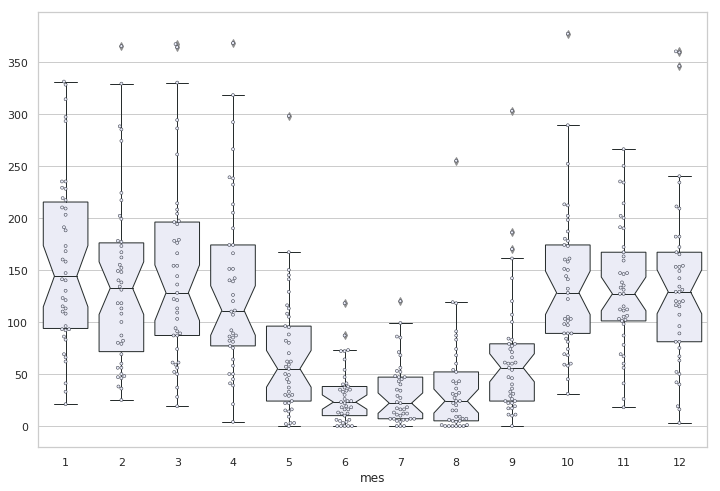

In [113]:
paleta = sb.light_palette((210, 90, 60), input="husl")
c4='#56cbf9'
c2='#e9ebf8'
c5='#f8f8f8'
c1='#30343f'
c3='#272d2d'
plt.figure(figsize=(12,8))
sb.boxplot(data=sumas,color=c2,notch=True,
           whiskerprops=dict(color=c3,linewidth=1),
           capprops=dict(color=c3,linewidth=1),
           boxprops = dict(linewidth=1, edgecolor=c3),
           medianprops = dict(linewidth=1, color=c3))

sb.swarmplot(data=sumas, color=c2,size=3,edgecolor=c1,linewidth=0.5)

In [120]:
plo.iplot(kind='box')

AttributeError: ignored